<a href="https://colab.research.google.com/github/Celtao123/22b1278-SOC--159/blob/main/TSAFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [5]:
data= pd.read_csv('train.csv',index_col=0)
data.index = pd.to_datetime(data.index)

In [6]:

data.head()



,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


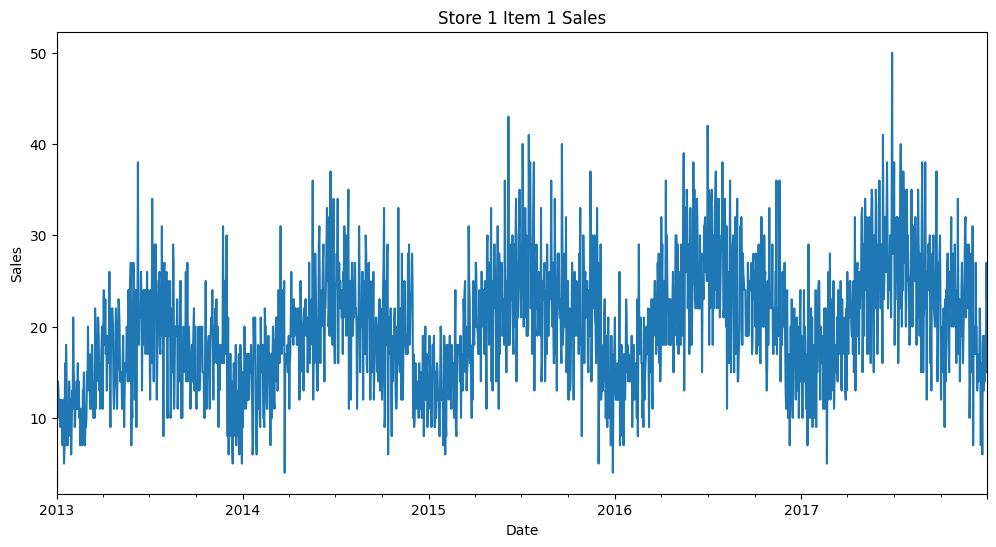

In [7]:
store_item_data = data[(data['store'] == 1) & (data['item'] == 1)].copy()

store_item_data['sales'].plot(figsize=(12, 6), title='Store 1 Item 1 Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller
##Dickey fuller test for stationarity
result = adfuller(store_item_data['sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.1576705563328042
p-value: 0.02256938062657153


In [9]:
##therefore the series is stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

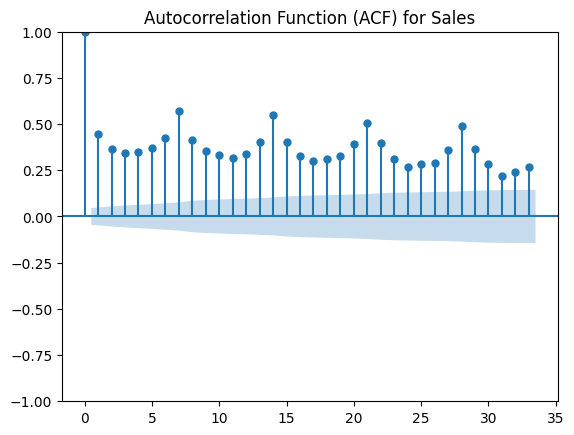

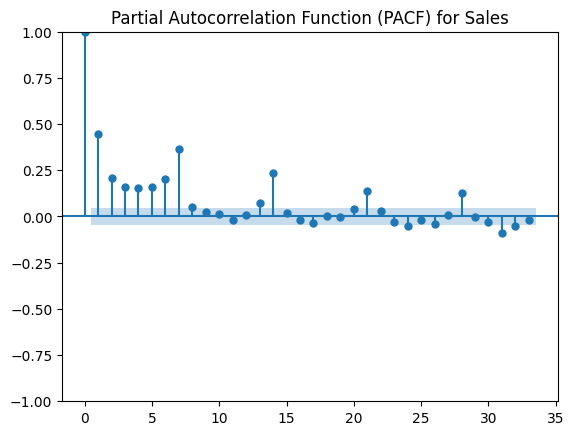

In [10]:
# Plotting ACF
plot_acf(store_item_data['sales'])
plt.title('Autocorrelation Function (ACF) for Sales')
plt.show()

# Plotting PACF
plot_pacf(store_item_data['sales'])
plt.title('Partial Autocorrelation Function (PACF) for Sales')
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Using differenced data if needed
model = ARIMA(store_item_data['sales'], order=(2, 0, 1))  # Replace p, d, q with actual values
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -5667.020
Date:                Thu, 08 Aug 2024   AIC                          11344.040
Time:                        12:55:52   BIC                          11371.590
Sample:                    01-01-2013   HQIC                         11354.202
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1207      2.058      9.293      0.000      15.088      23.153
ar.L1          1.0661      0.027     39.740      0.000       1.013       1.119
ar.L2         -0.0713      0.026     -2.712      0.0

In [12]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [13]:
# Load the test dataset
test_data = pd.read_csv('test.csv', parse_dates=True, index_col='date')

# Ensure the date column is in datetime format and set as index (if not already)
test_data.index = pd.to_datetime(test_data.index)

In [14]:
data_1 = test_data[(test_data['store'] == 1) & (test_data['item'] == 1)].copy()

In [17]:
data_1

,id,store,item,Predictions
date,,,,
2018-01-01,0,1,1,16.278213
2018-01-02,1,1,1,15.241598
2018-01-03,2,1,1,16.124411
2018-01-04,3,1,1,17.108089
2018-01-05,4,1,1,16.759935
...,...,...,...,...
2018-03-27,85,1,1,20.096606
2018-03-28,86,1,1,20.446895
2018-03-29,87,1,1,20.482820


In [18]:
# Predict the values for the test data period
start = len(data_1)
end = start + len(data_1) - 1

predictions = model_fit.predict(start=start, end=end, dynamic=False)

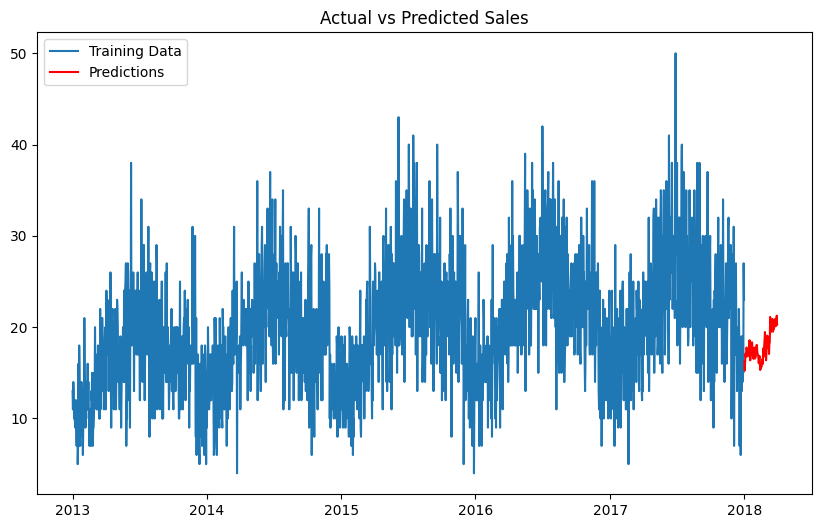

In [19]:

data_1['Predictions'] = predictions.values

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(store_item_data.index, store_item_data['sales'], label='Training Data')
plt.plot(data_1.index, data_1['Predictions'], label='Predictions', color='red')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()